This is the Notebook to evaluate your Dataset

# Check for Invalid Pictures

In [1]:
from pathlib import Path
import imghdr
import os

DATA_DIR = "datasets/unzipped/AI Art vs Real Art/" # Put unzipped files to the unzipped folder and change accordingly
IMAGE_EXTENSIONS = [".png", ".jpg", ".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(DATA_DIR).rglob("*"):
    if filepath.suffix.lower() in IMAGE_EXTENSIONS:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/nXLRsgDqpZcqChDus9b1_9.4899x.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/89644a996fdd0cfc9e06398c64320fbe.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/xATrJT1OBHIRSWYpTL8t--1--Z5XOZ_4x.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/zjgkiTBuW5pPg4P7rV8u_4x.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/BM6NugXodzCJUvbfOEPc_6x.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/640px-22Mona_Lisa22_with_DeepDream_effect_using_VGG16_network_trained_on_ImageNet.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/a823fafc36560121553573b1a7252334d9616c2f-1216x705.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/hwXBAos.jpg is not an image
datasets/unzipped/AI Art vs Real Art/AiArtData/AiArtData/403e1ee688f55ae08740e13dbcaae5633f7c1d3a-40

# Import Tensorflow and Keras

In [2]:
import tensorflow as tf
import keras # we define like this for IntelliSense

# We define the constants for our images
BATCH_SIZE = 16
HEIGHT = 256
WIDTH = 256
IMAGE_SIZE = (HEIGHT, WIDTH)

# Sample Load Datasets

In [26]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    label_mode='binary',
    labels='inferred',
    color_mode='rgb',
    directory=DATA_DIR,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    seed=1337,
    validation_split=0.2,
    subset="training",
    verbose=True,
)
val_dataset = keras.preprocessing.image_dataset_from_directory(
    label_mode='binary',
    labels='inferred',
    color_mode='rgb',
    directory=DATA_DIR,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    seed=1337,
    validation_split=0.2, # use 20% as validation
    subset="validation",
    verbose=True,

)
# The target labels
class_names = train_dataset.class_names
print(class_names)

Found 913 files belonging to 2 classes.
Using 731 files for training.
Found 913 files belonging to 2 classes.
Using 182 files for validation.
['AiArtData', 'RealArt']


# Display sample images

2024-04-29 13:28:58.355767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


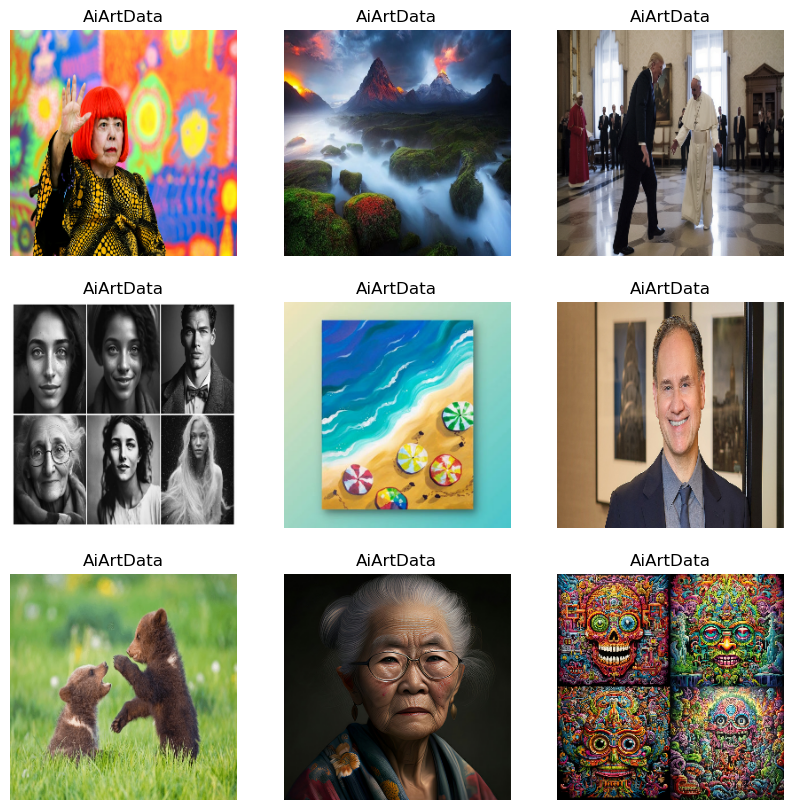

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")